# we found the effect sizes, let's make sure it makes sense

In [1]:
import pandas as pd
full_table = '/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTableLong.txt'
full_table = pd.read_csv(full_table, sep='\t')
full_table

,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|)
0,chr1,795000,795100.0,783384,1.8810,0.45920,4.097,1.138000e-04
1,chr1,846400,846500.0,834961,0.4790,0.09055,5.290,1.406000e-06
2,chr1,865600,865700.0,859335,0.4703,0.11320,4.155,9.291000e-05
3,chr1,877200,877300.0,889920,-1.3300,0.26390,-5.040,3.676000e-06
4,chr1,878100,878200.0,880884,-0.6849,0.15050,-4.552,2.261000e-05
...,...,...,...,...,...,...,...,...
8897,chr22,49391500,49391600.0,49383656,0.7830,0.15800,4.955,5.068000e-06
8898,chr22,49391600,49391700.0,49390483,1.4380,0.19260,7.468,2.021000e-10
8899,chr22,49398100,49398200.0,49404768,-0.6065,0.13590,-4.463,3.123000e-05
8900,chr22,49405900,49406000.0,49386579,-0.6270,0.14730,-4.257,6.498000e-05


In [2]:
qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
qtls

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,abs_gkm_SVM,abs_kmer_SVM,CADD,GWAVA_region,GWAVA_tss,GWAVA_unmatched,GERP,label,match
0,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,2.821422,6.027648,1.739152,0.29,0.36,0.89,2.150,1,True
1,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,7.167236,10.870018,-0.091378,0.42,0.49,0.66,0.451,1,True
2,chr1,3359707,chr1.3359707,chr1,3369847,rs55665824,G,A,-5.249735,-4.336111,5.249735,4.336111,0.932819,0.43,0.47,0.65,0.354,1,True
3,chr1,11731989,chr1.11731989,chr1,11809402,rs11121820,G,T,-1.585787,-1.229891,1.585787,1.229891,0.197824,0.37,0.32,0.40,-4.200,1,True
4,chr1,11964848,chr1.11964848,chr1,12042261,rs2236055,A,G,2.366937,1.784808,2.366937,1.784808,3.482362,0.23,0.22,0.64,2.110,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,chr9,140058004,chr9.140058004,chr9,140938183,rs3750506,A,G,0.487228,1.529274,0.487228,1.529274,-0.580919,0.22,0.33,0.38,-7.050,-1,True
17502,chr9,140073118,chr9.140073118,chr9,140953297,rs10780199,G,A,2.804388,5.312007,2.804388,5.312007,0.245404,0.31,0.40,0.29,0.961,-1,True
17503,chr9,140155407,chr9.140155407,chr9,141035586,rs7852209,T,C,0.444036,-1.583811,0.444036,1.583811,-0.606667,0.19,0.22,0.25,-0.890,-1,True
17504,chr9,140181121,chr9.140181121,chr9,141061300,rs4066694,T,C,1.363332,1.703144,1.363332,1.703144,0.489617,0.42,0.14,0.16,0.118,-1,True


In [3]:
#let's see what chrombpnet does with this
#so they first create a snp name byy doing this
full_table["rsid"] = full_table["Chr"]+"."+full_table["SNP"].astype(str)
full_table

,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid
0,chr1,795000,795100.0,783384,1.8810,0.45920,4.097,1.138000e-04,chr1.783384
1,chr1,846400,846500.0,834961,0.4790,0.09055,5.290,1.406000e-06,chr1.834961
2,chr1,865600,865700.0,859335,0.4703,0.11320,4.155,9.291000e-05,chr1.859335
3,chr1,877200,877300.0,889920,-1.3300,0.26390,-5.040,3.676000e-06,chr1.889920
4,chr1,878100,878200.0,880884,-0.6849,0.15050,-4.552,2.261000e-05,chr1.880884
...,...,...,...,...,...,...,...,...,...
8897,chr22,49391500,49391600.0,49383656,0.7830,0.15800,4.955,5.068000e-06,chr22.49383656
8898,chr22,49391600,49391700.0,49390483,1.4380,0.19260,7.468,2.021000e-10,chr22.49390483
8899,chr22,49398100,49398200.0,49404768,-0.6065,0.13590,-4.463,3.123000e-05,chr22.49404768
8900,chr22,49405900,49406000.0,49386579,-0.6270,0.14730,-4.257,6.498000e-05,chr22.49386579


In [4]:
#now see how many of these are in SNPname1 of qtls df
snps = full_table["rsid"]
print(len(snps))
print(len(snps.unique())) #all u nique

8902
8902


In [7]:
excluded = 0
for snp in snps:
    if snp not in qtls["SNPname1"].values:
        excluded += 1
print(excluded)
#there's onlly 400 lmao, this is useless...

8573


In [10]:
#let's load in the full list
# qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/41588_2015_BFng3331_MOESM26_ESM.xlsx', sep='\t', header=0)
#read in the excel file
vars_list = pd.read_excel('/data1/lesliec/sarthak/data/joint_playground/dsQTL/41588_2015_BFng3331_MOESM26_ESM.xlsx', sheet_name='SuppTable1')
vars_list

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,abs_gkm_SVM,abs_kmer_SVM,CADD,GWAVA_region,GWAVA_tss,GWAVA_unmatched,GERP,label
0,chr1,846446,chr1.846446,chr1,856583,rs141671872,A,G,2.653531,7.938784,2.653531,7.938784,-1.522533,0.48,0.53,0.75,-0.682,1
1,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,2.821422,6.027648,1.739152,0.29,0.36,0.89,2.150,1
2,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,7.167236,10.870018,-0.091378,0.42,0.49,0.66,0.451,1
3,chr1,1217275,chr1.1217275,chr1,1227412,rs112571439,A,G,-3.957382,2.387491,3.957382,2.387491,1.127472,0.34,0.43,0.49,2.430,1
4,chr1,1580438,chr1.1580438,chr1,1590575,rs9661285,A,G,-4.785596,-6.827102,4.785596,6.827102,0.665464,0.38,0.35,0.86,1.640,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,chr9,140155407,chr9.140155407,chr9,141035586,rs7852209,T,C,0.444036,-1.583811,0.444036,1.583811,-0.606667,0.19,0.22,0.25,-0.890,-1
28305,chr9,140181121,chr9.140181121,chr9,141061300,rs4066694,T,C,1.363332,1.703144,1.363332,1.703144,0.489617,0.42,0.14,0.16,0.118,-1
28306,chr9,140213801,chr9.140213801,chr9,141093980,rs7046723,A,G,-3.102628,3.391616,3.102628,3.391616,-0.744948,0.23,0.18,0.35,0.000,-1
28307,chr9,140219484,chr9.140219484,chr9,141099663,rs12340415,G,C,-4.628759,-2.087131,4.628759,2.087131,-0.809512,0.41,0.27,0.15,0.000,-1


In [11]:
excluded = 0
for snp in snps:
    if snp not in vars_list["SNPname1"].values:
        excluded += 1
print(excluded)
#still like all of them, wtf? Let's see what chrombpnet does

8480


# full chrombpnet preprocessing

In [22]:
import pandas as pd
gkm_svm = pd.read_excel('/data1/lesliec/sarthak/data/joint_playground/dsQTL/41588_2015_BFng3331_MOESM26_ESM.xlsx', sheet_name='SuppTable1')
gkm_svm

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,abs_gkm_SVM,abs_kmer_SVM,CADD,GWAVA_region,GWAVA_tss,GWAVA_unmatched,GERP,label
0,chr1,846446,chr1.846446,chr1,856583,rs141671872,A,G,2.653531,7.938784,2.653531,7.938784,-1.522533,0.48,0.53,0.75,-0.682,1
1,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,2.821422,6.027648,1.739152,0.29,0.36,0.89,2.150,1
2,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,7.167236,10.870018,-0.091378,0.42,0.49,0.66,0.451,1
3,chr1,1217275,chr1.1217275,chr1,1227412,rs112571439,A,G,-3.957382,2.387491,3.957382,2.387491,1.127472,0.34,0.43,0.49,2.430,1
4,chr1,1580438,chr1.1580438,chr1,1590575,rs9661285,A,G,-4.785596,-6.827102,4.785596,6.827102,0.665464,0.38,0.35,0.86,1.640,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,chr9,140155407,chr9.140155407,chr9,141035586,rs7852209,T,C,0.444036,-1.583811,0.444036,1.583811,-0.606667,0.19,0.22,0.25,-0.890,-1
28305,chr9,140181121,chr9.140181121,chr9,141061300,rs4066694,T,C,1.363332,1.703144,1.363332,1.703144,0.489617,0.42,0.14,0.16,0.118,-1
28306,chr9,140213801,chr9.140213801,chr9,141093980,rs7046723,A,G,-3.102628,3.391616,3.102628,3.391616,-0.744948,0.23,0.18,0.35,0.000,-1
28307,chr9,140219484,chr9.140219484,chr9,141099663,rs12340415,G,C,-4.628759,-2.087131,4.628759,2.087131,-0.809512,0.41,0.27,0.15,0.000,-1


In [3]:
sum(gkm_svm["label"]==1), sum(gkm_svm["label"]==-1)

(574, 27735)

In [4]:
es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTableLong.txt', sep='\t')
es

,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|)
0,chr1,795000,795100.0,783384,1.8810,0.45920,4.097,1.138000e-04
1,chr1,846400,846500.0,834961,0.4790,0.09055,5.290,1.406000e-06
2,chr1,865600,865700.0,859335,0.4703,0.11320,4.155,9.291000e-05
3,chr1,877200,877300.0,889920,-1.3300,0.26390,-5.040,3.676000e-06
4,chr1,878100,878200.0,880884,-0.6849,0.15050,-4.552,2.261000e-05
...,...,...,...,...,...,...,...,...
8897,chr22,49391500,49391600.0,49383656,0.7830,0.15800,4.955,5.068000e-06
8898,chr22,49391600,49391700.0,49390483,1.4380,0.19260,7.468,2.021000e-10
8899,chr22,49398100,49398200.0,49404768,-0.6065,0.13590,-4.463,3.123000e-05
8900,chr22,49405900,49406000.0,49386579,-0.6270,0.14730,-4.257,6.498000e-05


In [23]:
gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)  
es["rsid"] = es["Chr"]+"."+es["SNP"].astype(str)
gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')
gkm_svm

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,...,rsid_x,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid_y
0,chr1,846446,chr1.846446,chr1,856583,rs141671872,A,G,2.653531,7.938784,...,chr1_856583_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,...,chr1_911595_G_A,chr1,901400.0,901500.0,901458.0,-0.6285,0.08721,-7.207,6.010000e-10,chr1.901458
2,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,...,chr1_1186502_T_A,chr1,1176300.0,1176400.0,1176365.0,-0.7363,0.08125,-9.062,2.607000e-13,chr1.1176365
3,chr1,1217275,chr1.1217275,chr1,1227412,rs112571439,A,G,-3.957382,2.387491,...,chr1_1227412_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,1580438,chr1.1580438,chr1,1590575,rs9661285,A,G,-4.785596,-6.827102,...,chr1_1590575_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,chr9,140155407,chr9.140155407,chr9,141035586,rs7852209,T,C,0.444036,-1.583811,...,chr9_141035586_T_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28305,chr9,140181121,chr9.140181121,chr9,141061300,rs4066694,T,C,1.363332,1.703144,...,chr9_141061300_T_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28306,chr9,140213801,chr9.140213801,chr9,141093980,rs7046723,A,G,-3.102628,3.391616,...,chr9_141093980_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28307,chr9,140219484,chr9.140219484,chr9,141099663,rs12340415,G,C,-4.628759,-2.087131,...,chr9_141099663_G_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#ok so it contains only values of es that match, let's see how many match
gkm_svm['rsid_y'].isna().sum() #this is the number of rows that are not in es

27887

In [7]:
#so that puts the total at
gkm_svm.shape[0] - gkm_svm['rsid_y'].isna().sum()

422

In [8]:
#let's look at their final thing which includes all chrombpnet and enformer scores, let's see if ours are similar!

#only 574 of them have an estimate! wait not even lol

# /data1/lesliec/sarthak/data/joint_playground/dsQTL/dsqtls.yoruba.lcls.benchmarking.all.tsv
final = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/dsqtls.yoruba.lcls.benchmarking.all.tsv', sep='\t')
final

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.248566,0.044994,0.021877,0.127298,0.291935,0.067401,0.004840,0.065098,0.049902,0.001360
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.726685,0.002535,0.027762,0.056287,0.093192,0.036053,0.002239,0.045314,0.034489,0.000898
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.696101,0.021468,0.029658,0.349964,-0.402188,-0.038791,0.008839,-0.163023,-0.039080,0.002210
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.521835,0.265543,0.137196,0.518532,-0.622704,-0.222396,0.086945,-0.259064,-0.172960,0.027583
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.988211,0.006033,0.053680,0.103350,-0.061906,-0.050589,0.003275,-0.032300,-0.023135,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,chr9,141035586,T,C,rs7852209,-1,True,NaN,0.444036,0.000001,...,0.025047,0.000059,0.000146,0.000272,-0.017531,-0.006130,0.000007,-0.005638,-0.005843,0.000012
28305,chr9,141061300,T,C,rs4066694,-1,True,NaN,1.363332,0.000005,...,0.014079,0.000292,0.000122,0.000375,0.012734,0.005202,0.000001,0.004291,0.006334,0.000001
28306,chr9,141093980,A,G,rs7046723,-1,False,NaN,-3.102628,NaN,...,0.020137,0.000561,0.000212,0.000949,-0.040221,-0.008553,0.000006,-0.002303,-0.008658,0.000007
28307,chr9,141099663,G,C,rs12340415,-1,True,NaN,-4.628759,0.000054,...,0.071906,0.003268,0.001369,0.007073,-0.078796,-0.024984,0.000363,-0.058602,-0.037741,0.000777


In [14]:
#see the obs.estimate column how many are not nan
final.shape[0] - final['obs.estimate'].isna().sum() #this is the number of rows that are not in es
#huh it's 621 that have numbers...

621

In [15]:
final[~final['obs.estimate'].isna()]

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.248566,0.044994,0.021877,0.127298,0.291935,0.067401,0.004840,0.065098,0.049902,0.001360
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.726685,0.002535,0.027762,0.056287,0.093192,0.036053,0.002239,0.045314,0.034489,0.000898
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.696101,0.021468,0.029658,0.349964,-0.402188,-0.038791,0.008839,-0.163023,-0.039080,0.002210
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.521835,0.265543,0.137196,0.518532,-0.622704,-0.222396,0.086945,-0.259064,-0.172960,0.027583
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.988211,0.006033,0.053680,0.103350,-0.061906,-0.050589,0.003275,-0.032300,-0.023135,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24848,chr6,167370230,T,C,rs2247314,-1,True,0.3487,-2.903567,-0.000857,...,0.942742,0.000641,0.014169,0.039470,-0.029902,-0.011804,0.000330,-0.026587,-0.014512,0.000349
24933,chr6,170054831,A,G,rs73790084,-1,False,-0.9117,0.351054,NaN,...,0.887040,0.000274,0.008597,0.024752,0.032346,0.012775,0.000382,0.009409,0.008892,0.000082
27527,chr9,101017990,G,C,rs7853847,-1,True,-0.5329,-4.438063,-0.000790,...,0.984609,0.000577,0.037802,0.014927,0.011734,0.034720,0.000564,-0.008517,-0.025670,0.000421
27741,chr9,130330607,G,C,rs2249006,-1,True,0.5625,2.477864,-0.000046,...,0.354627,0.001267,0.006130,0.023987,0.105831,0.023526,0.001148,0.066142,0.020205,0.000789


In [24]:
#let's go line by line with the one I have
final_estimate = final[~final['obs.estimate'].isna()]
gkm_svm_estimate = gkm_svm[~gkm_svm['Estimate'].isna()]
print(final_estimate.shape, gkm_svm_estimate.shape)

(621, 45) (422, 28)


In [26]:
final_estimate

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.248566,0.044994,0.021877,0.127298,0.291935,0.067401,0.004840,0.065098,0.049902,0.001360
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.726685,0.002535,0.027762,0.056287,0.093192,0.036053,0.002239,0.045314,0.034489,0.000898
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.696101,0.021468,0.029658,0.349964,-0.402188,-0.038791,0.008839,-0.163023,-0.039080,0.002210
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.521835,0.265543,0.137196,0.518532,-0.622704,-0.222396,0.086945,-0.259064,-0.172960,0.027583
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.988211,0.006033,0.053680,0.103350,-0.061906,-0.050589,0.003275,-0.032300,-0.023135,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24848,chr6,167370230,T,C,rs2247314,-1,True,0.3487,-2.903567,-0.000857,...,0.942742,0.000641,0.014169,0.039470,-0.029902,-0.011804,0.000330,-0.026587,-0.014512,0.000349
24933,chr6,170054831,A,G,rs73790084,-1,False,-0.9117,0.351054,NaN,...,0.887040,0.000274,0.008597,0.024752,0.032346,0.012775,0.000382,0.009409,0.008892,0.000082
27527,chr9,101017990,G,C,rs7853847,-1,True,-0.5329,-4.438063,-0.000790,...,0.984609,0.000577,0.037802,0.014927,0.011734,0.034720,0.000564,-0.008517,-0.025670,0.000421
27741,chr9,130330607,G,C,rs2249006,-1,True,0.5625,2.477864,-0.000046,...,0.354627,0.001267,0.006130,0.023987,0.105831,0.023526,0.001148,0.066142,0.020205,0.000789


In [27]:
gkm_svm_estimate

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,...,rsid_x,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid_y
1,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,...,chr1_911595_G_A,chr1,901400.0,901500.0,901458.0,-0.6285,0.08721,-7.207,6.010000e-10,chr1.901458
2,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,...,chr1_1186502_T_A,chr1,1176300.0,1176400.0,1176365.0,-0.7363,0.08125,-9.062,2.607000e-13,chr1.1176365
6,chr1,11731989,chr1.11731989,chr1,11809402,rs11121820,G,T,-1.585787,-1.229891,...,chr1_11809402_G_T,chr1,11731900.0,11732000.0,11731989.0,-0.9398,0.08598,-10.930,1.266000e-16,chr1.11731989
7,chr1,11964848,chr1.11964848,chr1,12042261,rs2236055,A,G,2.366937,1.784808,...,chr1_12042261_A_G,chr1,11964800.0,11964900.0,11964848.0,1.1630,0.19750,5.889,1.326000e-07,chr1.11964848
8,chr1,15583640,chr1.15583640,chr1,15711053,rs9919124,A,T,-1.985658,-1.805157,...,chr1_15711053_A_T,chr1,15583600.0,15583700.0,15583640.0,-1.1670,0.21090,-5.533,5.459000e-07,chr1.15583640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25514,chr7,56084146,chr7.56084146,chr7,56116652,rs13241531,G,A,-2.139492,-0.709287,...,chr7_56116652_G_A,chr7,56099500.0,56099600.0,56084146.0,-0.9371,0.20790,-4.508,2.653000e-05,chr7.56084146
25856,chr7,128314329,chr7.128314329,chr7,128527093,rs11982744,T,G,1.097570,-1.733781,...,chr7_128527093_T_G,chr7,128307500.0,128307600.0,128314329.0,1.0320,0.18050,5.720,2.605000e-07,chr7.128314329
27777,chr9,130094318,chr9.130094318,chr9,131054497,rs75894668,C,T,0.037957,4.444479,...,chr9_131054497_C_T,chr9,130078400.0,130078500.0,130094318.0,1.4130,0.31340,4.508,2.647000e-05,chr9.130094318
27814,chr9,131155584,chr9.131155584,chr9,132115763,rs73621557,T,C,-4.139045,-5.640134,...,chr9_132115763_T_C,chr9,131151600.0,131151700.0,131155584.0,-1.7900,0.36620,-4.888,6.524000e-06,chr9.131155584


In [28]:
#why does row 0 of final have a score?
final.iloc[0]

var.chr                                                        chr1
var.pos_hg19                                                 856583
var.allele1                                                       A
var.allele2                                                       G
var.rsid                                                rs141671872
obs.label                                                         1
var.isused                                                     True
obs.estimate                                                 0.9301
pred.gkmsvm.encsr000emt.varscore.deltasvm                  2.653531
pred.enformer.encsr000emt.varscore.global_sad              0.000342
pred.enformer.encsr000emt.varscore.global_sar               0.00045
pred.enformer.encsr000emt.varscore.local_logfc             0.207411
pred.chrombpnet.encsr000emt.varscore.logfc                  0.20898
pred.chrombpnet.encsr000emt.varscore.jsd                    0.06313
pred.chrombpnet.encsr000emt.varscore.ips        

In [29]:
gkm_svm.iloc[0]

chrom_hg18                    chr1
pos_hg18                    846446
SNPname1               chr1.846446
chrom_hg19                    chr1
pos_hg19                    856583
SNPname2               rs141671872
allele1                          A
allele2                          G
gkm_SVM                   2.653531
kmer_SVM                  7.938784
abs_gkm_SVM               2.653531
abs_kmer_SVM              7.938784
CADD                     -1.522533
GWAVA_region                  0.48
GWAVA_tss                     0.53
GWAVA_unmatched               0.75
GERP                        -0.682
label                            1
rsid_x             chr1_856583_A_G
Chr                            NaN
Start                          NaN
End                            NaN
SNP                            NaN
Estimate                       NaN
Std. Error                     NaN
t value                        NaN
Pr(>|t|)                       NaN
rsid_y                         NaN
Name: 0, dtype: obje

In [31]:
#find this rsid in gkm_svm
gkm_svm[gkm_svm['SNPname2'] == 'rs141671872']

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,...,rsid_x,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid_y
0,chr1,846446,chr1.846446,chr1,856583,rs141671872,A,G,2.653531,7.938784,...,chr1_856583_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#there's literally no score...

In [25]:
#why are they different numbers wtf
for i in range(len(final_estimate)):
    if final_estimate.iloc[i]['var.rsid'] != gkm_svm_estimate.iloc[i]['SNPname2']:
        print(final_estimate.iloc[i]['var.rsid'], gkm_svm_estimate.iloc[i]['SNPname2'])
        break
#so the rsid in the final table is not the same as the one in the gkm_svm table

rs141671872 rs7417106


# let's redo and follow it exactly!

In [32]:
gkm_svm = pd.read_excel('/data1/lesliec/sarthak/data/joint_playground/dsQTL/41588_2015_BFng3331_MOESM26_ESM.xlsx', sheet_name='SuppTable1')
gkm_svm.head() #this is literally identical

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,abs_gkm_SVM,abs_kmer_SVM,CADD,GWAVA_region,GWAVA_tss,GWAVA_unmatched,GERP,label
0,chr1,846446,chr1.846446,chr1,856583,rs141671872,A,G,2.653531,7.938784,2.653531,7.938784,-1.522533,0.48,0.53,0.75,-0.682,1
1,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,2.821422,6.027648,1.739152,0.29,0.36,0.89,2.150,1
2,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,7.167236,10.870018,-0.091378,0.42,0.49,0.66,0.451,1
3,chr1,1217275,chr1.1217275,chr1,1227412,rs112571439,A,G,-3.957382,2.387491,3.957382,2.387491,1.127472,0.34,0.43,0.49,2.430,1
4,chr1,1580438,chr1.1580438,chr1,1590575,rs9661285,A,G,-4.785596,-6.827102,4.785596,6.827102,0.665464,0.38,0.35,0.86,1.640,1


In [33]:
es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTableLong.txt', sep='\t')
gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)  
es["rsid"] = es["Chr"]+"."+es["SNP"].astype(str)
gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')
gkm_svm.head()

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,...,rsid_x,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid_y
0,chr1,846446,chr1.846446,chr1,856583,rs141671872,A,G,2.653531,7.938784,...,chr1_856583_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,...,chr1_911595_G_A,chr1,901400.0,901500.0,901458.0,-0.6285,0.08721,-7.207,6.010000e-10,chr1.901458
2,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,...,chr1_1186502_T_A,chr1,1176300.0,1176400.0,1176365.0,-0.7363,0.08125,-9.062,2.607000e-13,chr1.1176365
3,chr1,1217275,chr1.1217275,chr1,1227412,rs112571439,A,G,-3.957382,2.387491,...,chr1_1227412_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,1580438,chr1.1580438,chr1,1590575,rs9661285,A,G,-4.785596,-6.827102,...,chr1_1590575_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
gkm_svm.shape


(28309, 28)

In [ ]:
#here is their code
'''
import pandas as pd
gkm_svm = pd.read_csv("/mnt/lab_data3/anusri/histone_expts/all_qtl_analysis/gm12878_sequence_sets/test_set/deltasv,/41588_2015_BFng3331_MOESM26_ESM.csv", header=0,sep=',')
es = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/dsqtls_lcl/GSE31388_dsQtlTable.txt.gz", sep="\t")
enformer_preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/dsqtls/process/fetch_enformer/enformer_predictions.tsv", sep="\t", header=0)
gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)  
es["rsid"] = es["Chr"]+"."+es["SNP"].astype(str)
gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')
'''

In [37]:
#chat gpt claims it's because of the data types
gkm_svm = pd.read_excel('/data1/lesliec/sarthak/data/joint_playground/dsQTL/41588_2015_BFng3331_MOESM26_ESM.xlsx', sheet_name='SuppTable1')
gkm_svm["pos_hg19"] = gkm_svm["pos_hg19"].astype(int)
gkm_svm['SNPname1'] = gkm_svm['SNPname1'].astype(str)
gkm_svm["rsid"] = (
    gkm_svm["chrom_hg19"].astype(str)
    + "_"
    + gkm_svm["pos_hg19"].astype(str)
    + "_"
    + gkm_svm["allele1"].astype(str)
    + "_"
    + gkm_svm["allele2"].astype(str)
)

es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTableLong.txt', sep='\t')
es["SNP"] = es["SNP"].astype(int)
es["rsid"] = es["Chr"].astype(str) + "." + es["SNP"].astype(str)

gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')
gkm_svm.head()

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,...,rsid_x,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid_y
0,chr1,846446,chr1.846446,chr1,856583,rs141671872,A,G,2.653531,7.938784,...,chr1_856583_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,...,chr1_911595_G_A,chr1,901400.0,901500.0,901458.0,-0.6285,0.08721,-7.207,6.010000e-10,chr1.901458
2,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,...,chr1_1186502_T_A,chr1,1176300.0,1176400.0,1176365.0,-0.7363,0.08125,-9.062,2.607000e-13,chr1.1176365
3,chr1,1217275,chr1.1217275,chr1,1227412,rs112571439,A,G,-3.957382,2.387491,...,chr1_1227412_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,1580438,chr1.1580438,chr1,1590575,rs9661285,A,G,-4.785596,-6.827102,...,chr1_1590575_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
es[es['rsid'] == 'chr1.846446']

,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid


In [40]:
#ok we literally can't find the name of that first rsid, 846446 in the file at all, let's make sure we downloaded it correctly
#just redownloaded the file, let's compare
es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTableLong.txt.gz', sep='\t')
es

,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|)
0,chr1,795000,795100.0,783384,1.8810,0.45920,4.097,1.138000e-04
1,chr1,846400,846500.0,834961,0.4790,0.09055,5.290,1.406000e-06
2,chr1,865600,865700.0,859335,0.4703,0.11320,4.155,9.291000e-05
3,chr1,877200,877300.0,889920,-1.3300,0.26390,-5.040,3.676000e-06
4,chr1,878100,878200.0,880884,-0.6849,0.15050,-4.552,2.261000e-05
...,...,...,...,...,...,...,...,...
8897,chr22,49391500,49391600.0,49383656,0.7830,0.15800,4.955,5.068000e-06
8898,chr22,49391600,49391700.0,49390483,1.4380,0.19260,7.468,2.021000e-10
8899,chr22,49398100,49398200.0,49404768,-0.6065,0.13590,-4.463,3.123000e-05
8900,chr22,49405900,49406000.0,49386579,-0.6270,0.14730,-4.257,6.498000e-05


In [42]:
#this is the same shape, we are somehow downloading some different data...
#let's look at the non long version
es2 = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTable.txt', sep='\t')
es2

,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|)
0,chr1,802000,802100.0,801099,1.3980,0.35600,3.926,2.043000e-04
1,chr1,846400,846500.0,846446,0.9301,0.17900,5.197,2.013000e-06
2,chr1,901300,901400.0,901912,-0.6247,0.15260,-4.094,1.148000e-04
3,chr1,901400,901500.0,901458,-0.6285,0.08721,-7.207,6.010000e-10
4,chr1,905000,905100.0,904803,-0.7331,0.17580,-4.169,8.843000e-05
...,...,...,...,...,...,...,...,...
6065,chr22,48975800,48975900.0,48975897,-0.4515,0.13100,-3.445,9.825000e-04
6066,chr22,49041600,49041700.0,49041614,-0.3606,0.09483,-3.802,3.092000e-04
6067,chr22,49082800,49082900.0,49083204,1.0370,0.26980,3.842,2.710000e-04
6068,chr22,49333100,49333200.0,49332654,-1.2440,0.32090,-3.877,2.406000e-04


In [43]:
#wait this one does have it!!
gkm_svm = pd.read_excel('/data1/lesliec/sarthak/data/joint_playground/dsQTL/41588_2015_BFng3331_MOESM26_ESM.xlsx', sheet_name='SuppTable1')
es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTable.txt', sep='\t')

gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)  
es["rsid"] = es["Chr"]+"."+es["SNP"].astype(str)
gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')
gkm_svm.head()

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,...,rsid_x,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid_y
0,chr1,846446,chr1.846446,chr1,856583,rs141671872,A,G,2.653531,7.938784,...,chr1_856583_A_G,chr1,846400.0,846500.0,846446.0,0.9301,0.17900,5.197,2.013000e-06,chr1.846446
1,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,...,chr1_911595_G_A,chr1,901400.0,901500.0,901458.0,-0.6285,0.08721,-7.207,6.010000e-10,chr1.901458
2,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,...,chr1_1186502_T_A,chr1,1176300.0,1176400.0,1176365.0,-0.7363,0.08125,-9.062,2.607000e-13,chr1.1176365
3,chr1,1217275,chr1.1217275,chr1,1227412,rs112571439,A,G,-3.957382,2.387491,...,chr1_1227412_A_G,chr1,1217200.0,1217300.0,1217275.0,-0.9236,0.13360,-6.912,2.041000e-09,chr1.1217275
4,chr1,1580438,chr1.1580438,chr1,1590575,rs9661285,A,G,-4.785596,-6.827102,...,chr1_1590575_A_G,chr1,1580400.0,1580500.0,1580438.0,-1.0890,0.15100,-7.211,5.902000e-10,chr1.1580438


In [45]:
#why in the actual fuck is it the short file but theyy call it the long file???
#now see how many are NA
gkm_svm.shape[0] - gkm_svm['Estimate'].isna().sum()
#now we have 621!!

621

In [ ]:
#wait, it turns out i'm the dumbass. I learned I don't know how to read

# redo with filtered data

In [47]:
#let's do it with the filtered data
gkm_svm = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTable.txt', sep='\t')

gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)  
es["rsid"] = es["Chr"]+"."+es["SNP"].astype(str)
gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')
gkm_svm

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,...,rsid_x,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid_y
0,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,...,chr1_911595_G_A,chr1,901400.0,901500.0,901458.0,-0.6285,0.08721,-7.207,6.010000e-10,chr1.901458
1,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,...,chr1_1186502_T_A,chr1,1176300.0,1176400.0,1176365.0,-0.7363,0.08125,-9.062,2.607000e-13,chr1.1176365
2,chr1,3359707,chr1.3359707,chr1,3369847,rs55665824,G,A,-5.249735,-4.336111,...,chr1_3369847_G_A,chr1,3359700.0,3359800.0,3359707.0,-0.7405,0.14450,-5.125,2.650000e-06,chr1.3359707
3,chr1,11731989,chr1.11731989,chr1,11809402,rs11121820,G,T,-1.585787,-1.229891,...,chr1_11809402_G_T,chr1,11731900.0,11732000.0,11731989.0,-0.9398,0.08598,-10.930,1.266000e-16,chr1.11731989
4,chr1,11964848,chr1.11964848,chr1,12042261,rs2236055,A,G,2.366937,1.784808,...,chr1_12042261_A_G,chr1,11964800.0,11964900.0,11964848.0,1.1630,0.19750,5.889,1.326000e-07,chr1.11964848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,chr9,140058004,chr9.140058004,chr9,140938183,rs3750506,A,G,0.487228,1.529274,...,chr9_140938183_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17502,chr9,140073118,chr9.140073118,chr9,140953297,rs10780199,G,A,2.804388,5.312007,...,chr9_140953297_G_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17503,chr9,140155407,chr9.140155407,chr9,141035586,rs7852209,T,C,0.444036,-1.583811,...,chr9_141035586_T_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17504,chr9,140181121,chr9.140181121,chr9,141061300,rs4066694,T,C,1.363332,1.703144,...,chr9_141061300_T_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#find how many of estimate is non zero
gkm_svm.shape[0] - gkm_svm['Estimate'].isna().sum()
#this is good enough to predict effect size I guess

470

In [49]:
gkm_svm['label'] #still have labels!

0        1
1        1
2        1
3        1
4        1
        ..
17501   -1
17502   -1
17503   -1
17504   -1
17505   -1
Name: label, Length: 17506, dtype: int64

In [52]:
(gkm_svm['label'] == 1).sum()

435

In [58]:
((gkm_svm['label'] == 1) & (gkm_svm['Estimate'].notna())).sum()


435

In [59]:
((gkm_svm['label'] == -1) & (gkm_svm['Estimate'].notna())).sum()

35

In [61]:
#all positive examples, and some that are negative, but very few
final = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/dsqtls.yoruba.lcls.benchmarking.all.tsv', sep='\t')
final

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.248566,0.044994,0.021877,0.127298,0.291935,0.067401,0.004840,0.065098,0.049902,0.001360
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.726685,0.002535,0.027762,0.056287,0.093192,0.036053,0.002239,0.045314,0.034489,0.000898
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.696101,0.021468,0.029658,0.349964,-0.402188,-0.038791,0.008839,-0.163023,-0.039080,0.002210
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.521835,0.265543,0.137196,0.518532,-0.622704,-0.222396,0.086945,-0.259064,-0.172960,0.027583
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.988211,0.006033,0.053680,0.103350,-0.061906,-0.050589,0.003275,-0.032300,-0.023135,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,chr9,141035586,T,C,rs7852209,-1,True,NaN,0.444036,0.000001,...,0.025047,0.000059,0.000146,0.000272,-0.017531,-0.006130,0.000007,-0.005638,-0.005843,0.000012
28305,chr9,141061300,T,C,rs4066694,-1,True,NaN,1.363332,0.000005,...,0.014079,0.000292,0.000122,0.000375,0.012734,0.005202,0.000001,0.004291,0.006334,0.000001
28306,chr9,141093980,A,G,rs7046723,-1,False,NaN,-3.102628,NaN,...,0.020137,0.000561,0.000212,0.000949,-0.040221,-0.008553,0.000006,-0.002303,-0.008658,0.000007
28307,chr9,141099663,G,C,rs12340415,-1,True,NaN,-4.628759,0.000054,...,0.071906,0.003268,0.001369,0.007073,-0.078796,-0.024984,0.000363,-0.058602,-0.037741,0.000777


In [62]:
((final['obs.label'] == 1) & (final['obs.estimate'].notna())).sum(), ((final['obs.label'] == -1) & (final['obs.estimate'].notna())).sum()

(573, 48)

In [63]:
final.keys()

Index(['var.chr', 'var.pos_hg19', 'var.allele1', 'var.allele2', 'var.rsid',
       'obs.label', 'var.isused', 'obs.estimate',
       'pred.gkmsvm.encsr000emt.varscore.deltasvm',
       'pred.enformer.encsr000emt.varscore.global_sad',
       'pred.enformer.encsr000emt.varscore.global_sar',
       'pred.enformer.encsr000emt.varscore.local_logfc',
       'pred.chrombpnet.encsr000emt.varscore.logfc',
       'pred.chrombpnet.encsr000emt.varscore.jsd',
       'pred.chrombpnet.encsr000emt.varscore.ips',
       'pred.chrombpnet.encsr000emt.varscore.aaq',
       'pred.chrombpnet.encsr000emt.varscore.ies',
       'pred.chrombpnet.encsr000emt.varscore.jsd_x_aaq',
       'pred.chrombpnet.encsr000emt.varscore.logfc_x_aaq',
       'pred.chrombpnet.encsr637xsc.varscore.logfc',
       'pred.chrombpnet.encsr637xsc.varscore.jsd',
       'pred.chrombpnet.encsr637xsc.varscore.ips',
       'pred.chrombpnet.encsr637xsc.varscore.aaq',
       'pred.chrombpnet.encsr637xsc.varscore.ies',
       'pred.chrombpnet

In [67]:
final.iloc[1]

var.chr                                                      chr1
var.pos_hg19                                               911595
var.allele1                                                     G
var.allele2                                                     A
var.rsid                                                rs7417106
obs.label                                                       1
var.isused                                                   True
obs.estimate                                              -0.6285
pred.gkmsvm.encsr000emt.varscore.deltasvm                2.821422
pred.enformer.encsr000emt.varscore.global_sad           -0.001241
pred.enformer.encsr000emt.varscore.global_sar           -0.001526
pred.enformer.encsr000emt.varscore.local_logfc          -0.434146
pred.chrombpnet.encsr000emt.varscore.logfc               0.082127
pred.chrombpnet.encsr000emt.varscore.jsd                 0.025999
pred.chrombpnet.encsr000emt.varscore.ips                 0.001013
pred.chrom

In [68]:
gkm_svm.iloc[0]

chrom_hg18                    chr1
pos_hg18                    901458
SNPname1               chr1.901458
chrom_hg19                    chr1
pos_hg19                    911595
SNPname2                 rs7417106
allele1                          G
allele2                          A
gkm_SVM                   2.821422
kmer_SVM                  6.027648
abs_gkm_SVM               2.821422
abs_kmer_SVM              6.027648
CADD                      1.739152
GWAVA_region                  0.29
GWAVA_tss                     0.36
GWAVA_unmatched               0.89
GERP                          2.15
label                            1
match                         True
rsid_x             chr1_911595_G_A
Chr                           chr1
Start                     901400.0
End                       901500.0
SNP                       901458.0
Estimate                   -0.6285
Std. Error                 0.08721
t value                     -7.207
Pr(>|t|)                       0.0
rsid_y              

# validating enformer
Enformer results should be easy enough to validate, get a singular example, like the first one from this filtered list

rs7417106 and see if in the final we get the same value as they have! row 0 of mine, row 1 of theirs

pred.enformer.encsr000emt.varscore.global_sad           -0.001241  
pred.enformer.encsr000emt.varscore.global_sar           -0.001526  
pred.enformer.encsr000emt.varscore.local_logfc          -0.434146  

In [69]:
#global score was -0.001241
import numpy as np
enformer = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/enformer_dsqtl.npy')
enformer.shape

(17506, 896, 2)

In [76]:
pred = enformer[0] #now we need to get logfold change
print(np.log2(pred[:,0] / pred[:,1]).mean()) #this is the log fold change
print(np.log2(pred[440:456,0] / pred[440:456,1]).mean())

0.0019498824805049915
0.13105925556311648


In [79]:
# #this is not how it's actually computed
# def predict_snp_effect_scores(ref_prob_preds, alt_prob_preds, logged=False, ref_logcount_preds=None, alt_count_preds=None):
#     '''
#     Predicts variant effect scores based on model predictions.

#     Arguments::
#        ref_logcount_preds: log count predictions at the reference allele with size (N,)
#        alt_logcount_preds: log count predictions at the alternate alele with size (N,)
#        ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
#        alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
#     Returns:
#         log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
#         log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
#         probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
#     '''
#     if ref_logcount_preds is not None and alt_count_preds is not None:
#         log_counts_diff = alt_count_preds - ref_logcount_preds
#     else:
#         log_counts_diff = 1
#     # log_counts_diff = np.mean(alt_prob_preds, axis=1) - np.mean(ref_prob_preds, axis=1) #model doesn't have count prediction head, so it's really bad!
#     # log_counts_diff = alt_count_preds - ref_count_preds
#     if logged:
#         log_probs_diff_abs_sum =  np.sum(np.abs((alt_prob_preds) -  (ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
#         ref_prob_preds = sigmoid(ref_prob_preds)
#         alt_prob_preds = sigmoid(alt_prob_preds)
#     else:
#         log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
#     probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)
#     integrative_effect_size = log_probs_diff_abs_sum * probs_jsd_diff

#     return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff, integrative_effect_size
np.sum(np.abs(np.log(pred[0]) -  np.log(pred[1])),axis=0)

0.21637344388421265

In [82]:
np.sum(np.abs(np.log(pred[440:456,0]) -  np.log(pred[440:456,1])),axis=0)

2.099997519440981

In [ ]:
#yo they actually used a different GM12878 track wtf? They used track 69, let's compare with that then... reran it
import numpy as np
enformer = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/enformer_dsqtl_track2.npy')
pred = enformer[0] #now we need to get logfold change
np.sum(np.abs(np.log(pred[440:456,0]) -  np.log(pred[440:456,1])),axis=0)
#still different, issue seems to be that it's using HG19 data, so hard to compare, let's see what SAD and SAR are and see if we can get that at least! 

2.865024438394814

In [ ]:
#figure out how to compute SAD and SAR to make sure those are identical!!
#so I can't really find anything, kind of strange but whatever I guess? They compute it exactly las we would, then they use PCA to reduce the dimensionality, they do it like this, we are making things more fair! 

# now doing the plots on the predictions

Also we can use a downloaded chrombpnet model that was used!

Key idea is that we will do the same plots they do to try to recreate results!

In [2]:
#let's now create a subset of the data
#first chrombpnet does this
import pandas as pd
data = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/dsqtls.yoruba.lcls.benchmarking.all.tsv', sep='\t')
dataf = data[data["var.isused"]]
dataf

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.248566,0.044994,0.021877,0.127298,0.291935,0.067401,0.004840,0.065098,0.049902,0.001360
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.726685,0.002535,0.027762,0.056287,0.093192,0.036053,0.002239,0.045314,0.034489,0.000898
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.696101,0.021468,0.029658,0.349964,-0.402188,-0.038791,0.008839,-0.163023,-0.039080,0.002210
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.521835,0.265543,0.137196,0.518532,-0.622704,-0.222396,0.086945,-0.259064,-0.172960,0.027583
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.988211,0.006033,0.053680,0.103350,-0.061906,-0.050589,0.003275,-0.032300,-0.023135,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28302,chr9,140938183,A,G,rs3750506,-1,True,NaN,0.487228,0.000005,...,0.015465,0.000287,0.000093,0.000505,-0.046869,-0.008768,0.000026,-0.026908,-0.006874,0.000050
28303,chr9,140953297,G,A,rs10780199,-1,True,NaN,2.804388,-0.000003,...,0.006603,0.000057,0.000028,0.000094,0.016504,0.005610,0.000002,0.002748,0.003831,0.000002
28304,chr9,141035586,T,C,rs7852209,-1,True,NaN,0.444036,0.000001,...,0.025047,0.000059,0.000146,0.000272,-0.017531,-0.006130,0.000007,-0.005638,-0.005843,0.000012
28305,chr9,141061300,T,C,rs4066694,-1,True,NaN,1.363332,0.000005,...,0.014079,0.000292,0.000122,0.000375,0.012734,0.005202,0.000001,0.004291,0.006334,0.000001


In [5]:
#print number of values in obs estimate that aren't nan
(dataf['obs.estimate'].notna()).sum()

606

In [3]:
#let's remake our data with this

gkm_svm = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTable.txt', sep='\t')

gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)  
es["rsid"] = es["Chr"]+"."+es["SNP"].astype(str)
gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')

gkm_svm

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,...,rsid_x,Chr,Start,End,SNP,Estimate,Std. Error,t value,Pr(>|t|),rsid_y
0,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,...,chr1_911595_G_A,chr1,901400.0,901500.0,901458.0,-0.6285,0.08721,-7.207,6.010000e-10,chr1.901458
1,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,...,chr1_1186502_T_A,chr1,1176300.0,1176400.0,1176365.0,-0.7363,0.08125,-9.062,2.607000e-13,chr1.1176365
2,chr1,3359707,chr1.3359707,chr1,3369847,rs55665824,G,A,-5.249735,-4.336111,...,chr1_3369847_G_A,chr1,3359700.0,3359800.0,3359707.0,-0.7405,0.14450,-5.125,2.650000e-06,chr1.3359707
3,chr1,11731989,chr1.11731989,chr1,11809402,rs11121820,G,T,-1.585787,-1.229891,...,chr1_11809402_G_T,chr1,11731900.0,11732000.0,11731989.0,-0.9398,0.08598,-10.930,1.266000e-16,chr1.11731989
4,chr1,11964848,chr1.11964848,chr1,12042261,rs2236055,A,G,2.366937,1.784808,...,chr1_12042261_A_G,chr1,11964800.0,11964900.0,11964848.0,1.1630,0.19750,5.889,1.326000e-07,chr1.11964848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,chr9,140058004,chr9.140058004,chr9,140938183,rs3750506,A,G,0.487228,1.529274,...,chr9_140938183_A_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17502,chr9,140073118,chr9.140073118,chr9,140953297,rs10780199,G,A,2.804388,5.312007,...,chr9_140953297_G_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17503,chr9,140155407,chr9.140155407,chr9,141035586,rs7852209,T,C,0.444036,-1.583811,...,chr9_141035586_T_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17504,chr9,140181121,chr9.140181121,chr9,141061300,rs4066694,T,C,1.363332,1.703144,...,chr9_141061300_T_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
(gkm_svm['Estimate'].notna()).sum()

470

In [7]:
dataf.keys()

Index(['var.chr', 'var.pos_hg19', 'var.allele1', 'var.allele2', 'var.rsid',
       'obs.label', 'var.isused', 'obs.estimate',
       'pred.gkmsvm.encsr000emt.varscore.deltasvm',
       'pred.enformer.encsr000emt.varscore.global_sad',
       'pred.enformer.encsr000emt.varscore.global_sar',
       'pred.enformer.encsr000emt.varscore.local_logfc',
       'pred.chrombpnet.encsr000emt.varscore.logfc',
       'pred.chrombpnet.encsr000emt.varscore.jsd',
       'pred.chrombpnet.encsr000emt.varscore.ips',
       'pred.chrombpnet.encsr000emt.varscore.aaq',
       'pred.chrombpnet.encsr000emt.varscore.ies',
       'pred.chrombpnet.encsr000emt.varscore.jsd_x_aaq',
       'pred.chrombpnet.encsr000emt.varscore.logfc_x_aaq',
       'pred.chrombpnet.encsr637xsc.varscore.logfc',
       'pred.chrombpnet.encsr637xsc.varscore.jsd',
       'pred.chrombpnet.encsr637xsc.varscore.ips',
       'pred.chrombpnet.encsr637xsc.varscore.aaq',
       'pred.chrombpnet.encsr637xsc.varscore.ies',
       'pred.chrombpnet

In [8]:
gkm_svm.keys()

Index(['chrom_hg18', 'pos_hg18', 'SNPname1', 'chrom_hg19', 'pos_hg19',
       'SNPname2', 'allele1', 'allele2', 'gkm_SVM', 'kmer_SVM', 'abs_gkm_SVM',
       'abs_kmer_SVM', 'CADD', 'GWAVA_region', 'GWAVA_tss', 'GWAVA_unmatched',
       'GERP', 'label', 'match', 'rsid_x', 'Chr', 'Start', 'End', 'SNP',
       'Estimate', 'Std. Error', 't value', 'Pr(>|t|)', 'rsid_y'],
      dtype='object')

In [10]:
#now we will make our names similar1
subset = gkm_svm[['chrom_hg19', 'pos_hg19', 'allele1', 'allele2', 'SNPname2', 'label', 'Estimate']]
subset

,chrom_hg19,pos_hg19,allele1,allele2,SNPname2,label,Estimate
0,chr1,911595,G,A,rs7417106,1,-0.6285
1,chr1,1186502,T,A,rs6603785,1,-0.7363
2,chr1,3369847,G,A,rs55665824,1,-0.7405
3,chr1,11809402,G,T,rs11121820,1,-0.9398
4,chr1,12042261,A,G,rs2236055,1,1.1630
...,...,...,...,...,...,...,...
17501,chr9,140938183,A,G,rs3750506,-1,NaN
17502,chr9,140953297,G,A,rs10780199,-1,NaN
17503,chr9,141035586,T,C,rs7852209,-1,NaN
17504,chr9,141061300,T,C,rs4066694,-1,NaN


In [11]:
#now rename the headers
headers = ['var.chr', 'var.pos_hg19', 'var.allele1', 'var.allele2', 'var.rsid', 'obs.label', 'obs.estimate']
subset.columns = headers
subset

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,obs.estimate
0,chr1,911595,G,A,rs7417106,1,-0.6285
1,chr1,1186502,T,A,rs6603785,1,-0.7363
2,chr1,3369847,G,A,rs55665824,1,-0.7405
3,chr1,11809402,G,T,rs11121820,1,-0.9398
4,chr1,12042261,A,G,rs2236055,1,1.1630
...,...,...,...,...,...,...,...
17501,chr9,140938183,A,G,rs3750506,-1,NaN
17502,chr9,140953297,G,A,rs10780199,-1,NaN
17503,chr9,141035586,T,C,rs7852209,-1,NaN
17504,chr9,141061300,T,C,rs4066694,-1,NaN


In [12]:
dataf

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.248566,0.044994,0.021877,0.127298,0.291935,0.067401,0.004840,0.065098,0.049902,0.001360
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.726685,0.002535,0.027762,0.056287,0.093192,0.036053,0.002239,0.045314,0.034489,0.000898
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.696101,0.021468,0.029658,0.349964,-0.402188,-0.038791,0.008839,-0.163023,-0.039080,0.002210
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.521835,0.265543,0.137196,0.518532,-0.622704,-0.222396,0.086945,-0.259064,-0.172960,0.027583
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.988211,0.006033,0.053680,0.103350,-0.061906,-0.050589,0.003275,-0.032300,-0.023135,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28302,chr9,140938183,A,G,rs3750506,-1,True,NaN,0.487228,0.000005,...,0.015465,0.000287,0.000093,0.000505,-0.046869,-0.008768,0.000026,-0.026908,-0.006874,0.000050
28303,chr9,140953297,G,A,rs10780199,-1,True,NaN,2.804388,-0.000003,...,0.006603,0.000057,0.000028,0.000094,0.016504,0.005610,0.000002,0.002748,0.003831,0.000002
28304,chr9,141035586,T,C,rs7852209,-1,True,NaN,0.444036,0.000001,...,0.025047,0.000059,0.000146,0.000272,-0.017531,-0.006130,0.000007,-0.005638,-0.005843,0.000012
28305,chr9,141061300,T,C,rs4066694,-1,True,NaN,1.363332,0.000005,...,0.014079,0.000292,0.000122,0.000375,0.012734,0.005202,0.000001,0.004291,0.006334,0.000001


Text(0, 0.5, 'Precision')

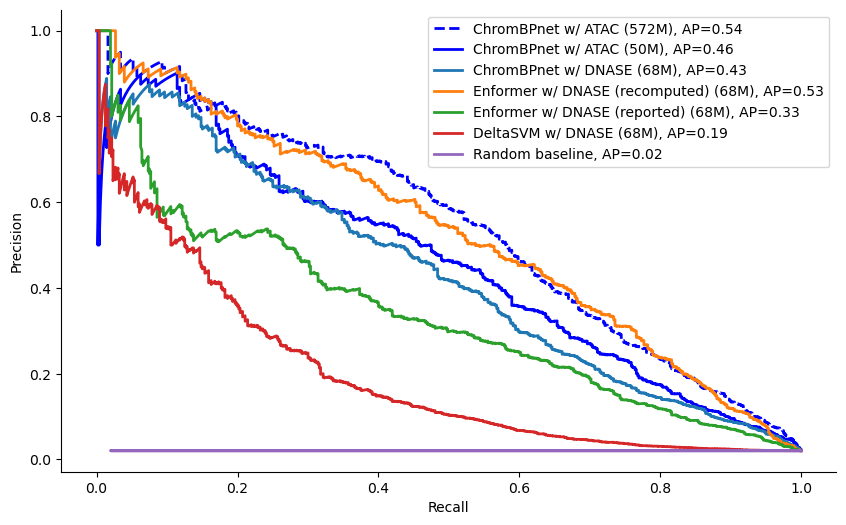

In [ ]:
#now we need to just attach the scores to the df to plot!

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse


fig, ax = plt.subplots(figsize=(10,6))

######################################

keyd="pred.chrombpnet.encsr637xsc.varscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr637xsc_50m.varscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr000emt.varscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.enformer.encsr000emt.varscore.local_logfc"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (recomputed) (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
enformer_auc_recomp = roc_auc

ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

# keyd="pred.enformer.encsr000emt.varscore.sad"
# label=dataf["obs.label"].astype(int)
# score=abs(dataf[keyd])
# title="Enformer w/ DNASE SAD (50M)"

# fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
# roc_auc = metrics.average_precision_score(label, score)
# ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.enformer.encsr000emt.varscore.global_sar"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (reported) (68M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

keyd="pred.gkmsvm.encsr000emt.varscore.deltasvm"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])
title="DeltaSVM w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
deltasvm_roc=roc_auc

roc_auc=sum(dataf["obs.label"]==1)/len(dataf["obs.label"])
ax.plot(fpr_chrombpnet, [sum(dataf["obs.label"]==1)/len(dataf["obs.label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

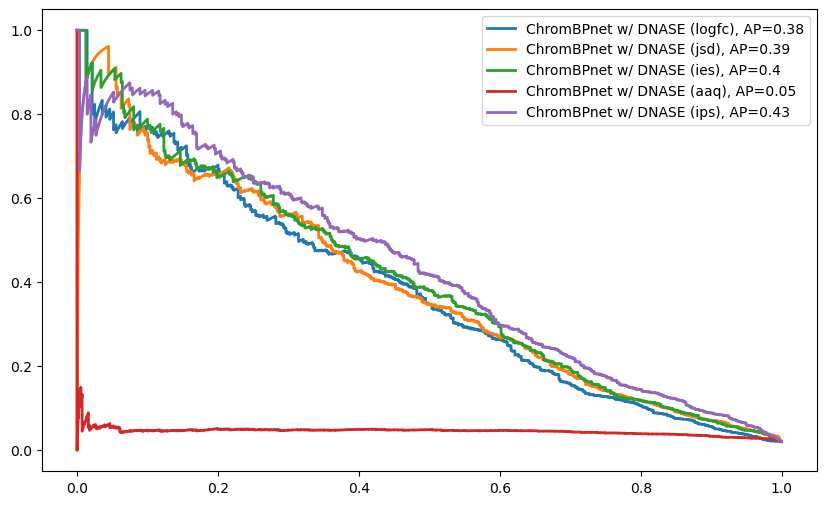

In [18]:
#the estimate and effect size aren't used for this plot at all!!

fig, ax = plt.subplots(figsize=(10,6))
keyd="pred.chrombpnet.encsr000emt.varscore.logfc"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (logfc)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

keyd="pred.chrombpnet.encsr000emt.varscore.jsd"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (jsd)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

keyd="pred.chrombpnet.encsr000emt.varscore.ies"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

keyd="pred.chrombpnet.encsr000emt.varscore.aaq"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (aaq)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

keyd="pred.chrombpnet.encsr000emt.varscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (ips)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

ax.legend()

In [19]:
#and let's load my chrombpnet predictions to compare!
pred_cbp = np.load('/data1/lesliec/sarthak/data/joint_playground/chrombpnet/GM12878_Tcellbias/var_prds.npz')
pred_cbp.keys()

KeysView(NpzFile '/data1/lesliec/sarthak/data/joint_playground/chrombpnet/GM12878_Tcellbias/var_prds.npz' with keys: profile, counts)

In [20]:
pred_cbp['profile'].shape

(17506, 1000, 2)

In [23]:
pred_cbp['counts'].shape

(17506, 1, 2)

In [24]:
#let's see what happens when we compute these metrics
#import jsd
from scipy.spatial.distance import jensenshannon

def predict_snp_effect_scores(ref_prob_preds, alt_prob_preds, logged=False, ref_logcount_preds=None, alt_count_preds=None):
    '''
    Predicts variant effect scores based on model predictions.

    Arguments::
       ref_logcount_preds: log count predictions at the reference allele with size (N,)
       alt_logcount_preds: log count predictions at the alternate alele with size (N,)
       ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
       alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
    Returns:
        log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
        log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
        probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
    '''
    if ref_logcount_preds is not None and alt_count_preds is not None:
        log_counts_diff = alt_count_preds - ref_logcount_preds
    else:
        log_counts_diff = 1
    # log_counts_diff = np.mean(alt_prob_preds, axis=1) - np.mean(ref_prob_preds, axis=1) #model doesn't have count prediction head, so it's really bad!
    # log_counts_diff = alt_count_preds - ref_count_preds
    if logged:
        raise NotImplementedError("Logged predictions not supported")
    #     log_probs_diff_abs_sum =  np.sum(np.abs((alt_prob_preds) -  (ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    #     ref_prob_preds = sigmoid(ref_prob_preds)
    #     alt_prob_preds = sigmoid(alt_prob_preds)
    else:
        log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)
    integrative_effect_size = log_probs_diff_abs_sum * probs_jsd_diff
    return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff, integrative_effect_size

out = predict_snp_effect_scores(pred_cbp['profile'][:,:,0], pred_cbp['profile'][:,:,1], False, pred_cbp['counts'][:,0,0], pred_cbp['counts'][:,0,1])
out[0].shape, out[1].shape, out[2].shape, out[3].shape

/tmp/ipykernel_2394867/298048873.py:32: RuntimeWarning: invalid value encountered in log
  log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)


((17506,), (17506,), (17506,), (17506,))

In [28]:
out[3]

array([0.0677641 ,        nan, 0.21339183, ..., 0.02348638, 0.08712632,
       0.1394591 ])

In [29]:
#show the elements of out[3] that are nan
np.isnan(out[3]).sum()

4556

In [30]:
#way too many lol, it's because we didn't softmaxx first

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # subtract max per row
    return e_x / e_x.sum(axis=1, keepdims=True)

out_sign = predict_snp_effect_scores(softmax(pred_cbp['profile'][:,:,0]), softmax(pred_cbp['profile'][:,:,1]), False, pred_cbp['counts'][:,0,0], pred_cbp['counts'][:,0,1])
out_nosign = predict_snp_effect_scores(softmax(pred_cbp['profile'][:,:,0]), softmax(pred_cbp['profile'][:,:,1]))

In [32]:
#now find na
np.isnan(out_sign[3]).sum(), np.isnan(out_nosign[3]).sum()

(0, 0)

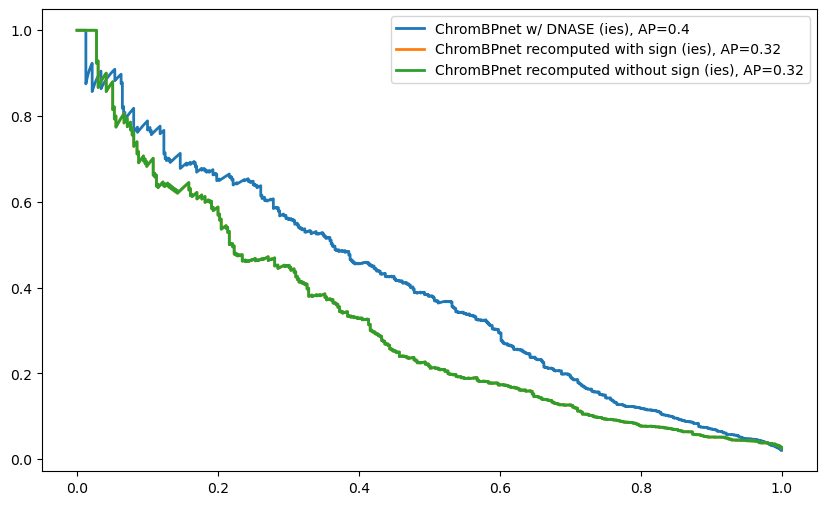

In [35]:
fig, ax = plt.subplots(figsize=(10,6))

keyd="pred.chrombpnet.encsr000emt.varscore.ies"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"].astype(int)
score=abs(out_sign[3])
title="ChromBPnet recomputed with sign (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"].astype(int)
score=abs(out_nosign[3])
title="ChromBPnet recomputed without sign (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

ax.legend()

In [ ]:
#final thing is we have some benchmarks from one of their trained models, trained on more ATAC I guess, let's see

#let's load it in
pred_cbp2 = np.load('/data1/lesliec/sarthak/data/joint_playground/chrombpnet/dsqtl_models/var_preds')
out_sign2 = predict_snp_effect_scores(softmax(pred_cbp2['profile'][:,:,0]), softmax(pred_cbp2['profile'][:,:,1]), False, pred_cbp2['counts'][:,0,0], pred_cbp2['counts'][:,0,1])

# redo this again to verify

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse

In [4]:
import pandas as pd
data = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/dsqtls.yoruba.lcls.benchmarking.all.tsv', sep='\t')
dataf = data[data["var.isused"]]
dataf

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.248566,0.044994,0.021877,0.127298,0.291935,0.067401,0.004840,0.065098,0.049902,0.001360
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.726685,0.002535,0.027762,0.056287,0.093192,0.036053,0.002239,0.045314,0.034489,0.000898
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.696101,0.021468,0.029658,0.349964,-0.402188,-0.038791,0.008839,-0.163023,-0.039080,0.002210
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.521835,0.265543,0.137196,0.518532,-0.622704,-0.222396,0.086945,-0.259064,-0.172960,0.027583
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.988211,0.006033,0.053680,0.103350,-0.061906,-0.050589,0.003275,-0.032300,-0.023135,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28302,chr9,140938183,A,G,rs3750506,-1,True,NaN,0.487228,0.000005,...,0.015465,0.000287,0.000093,0.000505,-0.046869,-0.008768,0.000026,-0.026908,-0.006874,0.000050
28303,chr9,140953297,G,A,rs10780199,-1,True,NaN,2.804388,-0.000003,...,0.006603,0.000057,0.000028,0.000094,0.016504,0.005610,0.000002,0.002748,0.003831,0.000002
28304,chr9,141035586,T,C,rs7852209,-1,True,NaN,0.444036,0.000001,...,0.025047,0.000059,0.000146,0.000272,-0.017531,-0.006130,0.000007,-0.005638,-0.005843,0.000012
28305,chr9,141061300,T,C,rs4066694,-1,True,NaN,1.363332,0.000005,...,0.014079,0.000292,0.000122,0.000375,0.012734,0.005202,0.000001,0.004291,0.006334,0.000001


In [5]:
#let's remake our data with this

gkm_svm = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTable.txt', sep='\t')

gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)  
es["rsid"] = es["Chr"]+"."+es["SNP"].astype(str)
gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')

#now we will make our names similar1
subset = gkm_svm[['chrom_hg19', 'pos_hg19', 'allele1', 'allele2', 'SNPname2', 'label', 'Estimate']]
#now rename the headers
headers = ['var.chr', 'var.pos_hg19', 'var.allele1', 'var.allele2', 'var.rsid', 'obs.label', 'obs.estimate']
subset.columns = headers
subset

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,obs.estimate
0,chr1,911595,G,A,rs7417106,1,-0.6285
1,chr1,1186502,T,A,rs6603785,1,-0.7363
2,chr1,3369847,G,A,rs55665824,1,-0.7405
3,chr1,11809402,G,T,rs11121820,1,-0.9398
4,chr1,12042261,A,G,rs2236055,1,1.1630
...,...,...,...,...,...,...,...
17501,chr9,140938183,A,G,rs3750506,-1,NaN
17502,chr9,140953297,G,A,rs10780199,-1,NaN
17503,chr9,141035586,T,C,rs7852209,-1,NaN
17504,chr9,141061300,T,C,rs4066694,-1,NaN


In [6]:
pred_cbp = np.load('/data1/lesliec/sarthak/data/joint_playground/chrombpnet/GM12878_Tcellbias/var_prds.npz')

from scipy.spatial.distance import jensenshannon

def predict_snp_effect_scores(ref_prob_preds, alt_prob_preds, logged=False, ref_logcount_preds=None, alt_count_preds=None):
    '''
    Predicts variant effect scores based on model predictions.

    Arguments::
       ref_logcount_preds: log count predictions at the reference allele with size (N,)
       alt_logcount_preds: log count predictions at the alternate alele with size (N,)
       ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
       alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
    Returns:
        log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
        log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
        probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
    '''
    if ref_logcount_preds is not None and alt_count_preds is not None:
        log_counts_diff = alt_count_preds - ref_logcount_preds
    else:
        log_counts_diff = 1
    # log_counts_diff = np.mean(alt_prob_preds, axis=1) - np.mean(ref_prob_preds, axis=1) #model doesn't have count prediction head, so it's really bad!
    # log_counts_diff = alt_count_preds - ref_count_preds
    if logged:
        raise NotImplementedError("Logged predictions not supported")
    #     log_probs_diff_abs_sum =  np.sum(np.abs((alt_prob_preds) -  (ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    #     ref_prob_preds = sigmoid(ref_prob_preds)
    #     alt_prob_preds = sigmoid(alt_prob_preds)
    else:
        log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)
    integrative_effect_size = log_probs_diff_abs_sum * probs_jsd_diff
    return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff, integrative_effect_size

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # subtract max per row
    return e_x / e_x.sum(axis=1, keepdims=True)

out_sign = predict_snp_effect_scores(softmax(pred_cbp['profile'][:,:,0]), softmax(pred_cbp['profile'][:,:,1]), False, pred_cbp['counts'][:,0,0], pred_cbp['counts'][:,0,1])

In [11]:
pred_cbp2 = np.load('/data1/lesliec/sarthak/data/joint_playground/chrombpnet/dsqtl_models/var_preds.npz')
out_sign2 = predict_snp_effect_scores(softmax(pred_cbp2['profile'][:,:,0]), softmax(pred_cbp2['profile'][:,:,1]), False, pred_cbp2['counts'][:,0,0], pred_cbp2['counts'][:,0,1])

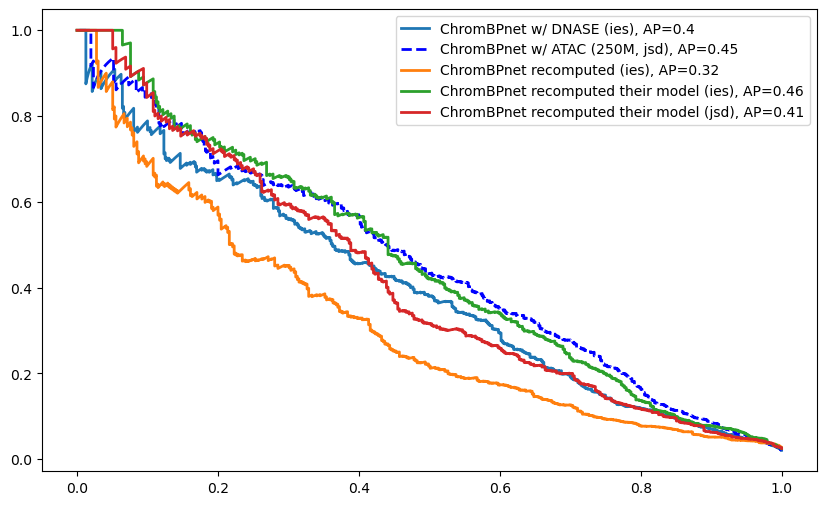

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))

keyd="pred.chrombpnet.encsr000emt.varscore.ies"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

keyd='pred.chrombpnet.encsr637xsc_250m.varscore.jsd'
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (250M, jsd)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))


label=gkm_svm["label"].astype(int)
score=abs(out_sign[3])
title="ChromBPnet recomputed (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"].astype(int)
score=abs(out_sign2[3])
title="ChromBPnet recomputed their model (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"].astype(int)
score=abs(out_sign2[2])
title="ChromBPnet recomputed their model (jsd)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))



ax.legend()

In [48]:
#let's subset the nonrecomputed to the recomputed ones, that way it's a fair comparison

common = set(subset['var.rsid']).intersection(dataf['var.rsid'])

subset_common = subset[subset['var.rsid'].isin(common)].copy()
dataf_common = dataf[dataf['var.rsid'].isin(common)].copy()

print(subset.shape, dataf.shape)

print(subset_common.shape, dataf_common.shape)

(17506, 7) (27373, 45)
(17505, 7) (17505, 45)


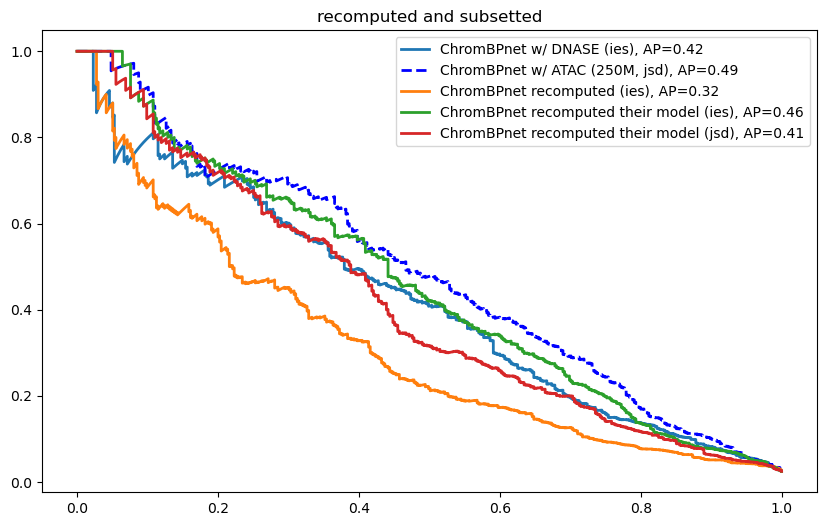

In [ ]:
#now let's redo this

fig, ax = plt.subplots(figsize=(10,6))

keyd="pred.chrombpnet.encsr000emt.varscore.ies"
label=dataf_common["obs.label"].astype(int)
score=abs(dataf_common[keyd])

title="ChromBPnet w/ DNASE (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

keyd='pred.chrombpnet.encsr637xsc_250m.varscore.jsd'
label=dataf_common["obs.label"].astype(int)
score=abs(dataf_common[keyd])

title="ChromBPnet w/ ATAC (250M, jsd)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))


label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out_sign[3])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out_sign2[3])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed their model (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out_sign2[2])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed their model (jsd)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

ax.set_title('recomputed and subsetted')

ax.legend()

In [49]:
vals = np.array([jensenshannon(x,y) for x,y in zip(pred_cbp2['profile'][:,:,0], pred_cbp2['profile'][:,:,1])])
vals = vals[subset['var.rsid'].isin(common)]
print(vals.shape) #yes this is right

vals2 = np.array([jensenshannon(x,y) for x,y in zip(softmax(pred_cbp2['profile'][:,:,0]), softmax(pred_cbp2['profile'][:,:,1]))])
vals2 = vals2[subset['var.rsid'].isin(common)]
print(vals2.shape) #yes this is right

#now compure auprc
roc_auc = metrics.average_precision_score(label, vals)
print(roc_auc)
roc_auc = metrics.average_precision_score(label, vals2)
print(roc_auc)

(17505,)
(17505,)
0.37053615634387543
0.4124278913669191


In [55]:
#so something that's really interesting, logfc is calculated using count head, not the profiles...
#same thing, the shifting helps avoid under/overflow and the temp is just temperature parameter
def softmax(x, temp=1):
    norm_x = x - np.mean(x, axis=1, keepdims=True)
    return np.exp(temp*norm_x)/np.sum(np.exp(temp*norm_x), axis=1, keepdims=True)

def get_variant_scores(allele1_pred_counts, allele2_pred_counts,
                       allele1_pred_profiles, allele2_pred_profiles):

    # print('allele1_pred_counts shape:', allele1_pred_counts.shape)
    # print('allele2_pred_counts shape:', allele2_pred_counts.shape)
    # print('allele1_pred_profiles shape:', allele1_pred_profiles.shape)
    # print('allele2_pred_profiles shape:', allele2_pred_profiles.shape)

    logfc = np.squeeze(np.log2(allele2_pred_counts / allele1_pred_counts))
    jsd = np.squeeze([jensenshannon(x, y, base=2.0)
                     for x,y in zip(softmax(allele2_pred_profiles),
                                    softmax(allele1_pred_profiles))])
    ies = logfc * jsd
    return logfc, jsd, ies

out2 = get_variant_scores(pred_cbp2['counts'][:,0,0], pred_cbp2['counts'][:,0,1], pred_cbp2['profile'][:,:,0], pred_cbp2['profile'][:,:,1])
print(out2[0].shape, out2[1].shape, out2[2].shape)
out = get_variant_scores(pred_cbp['counts'][:,0,0], pred_cbp['counts'][:,0,1], pred_cbp['profile'][:,:,0], pred_cbp['profile'][:,:,1])

(17506,) (17506,) (17506,)


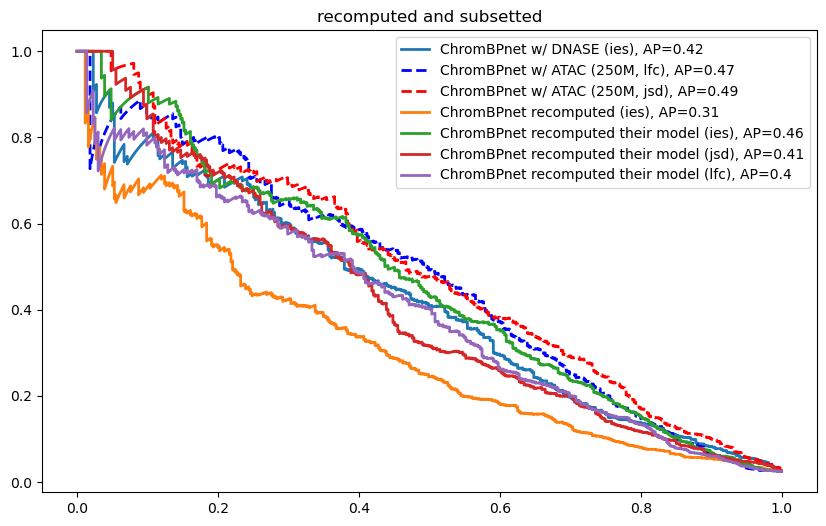

In [60]:
fig, ax = plt.subplots(figsize=(10,6))

keyd="pred.chrombpnet.encsr000emt.varscore.ies"
label=dataf_common["obs.label"].astype(int)
score=abs(dataf_common[keyd])

title="ChromBPnet w/ DNASE (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

keyd='pred.chrombpnet.encsr637xsc_250m.varscore.logfc'
label=dataf_common["obs.label"].astype(int)
score=abs(dataf_common[keyd])

title="ChromBPnet w/ ATAC (250M, lfc)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

keyd='pred.chrombpnet.encsr637xsc_250m.varscore.jsd'
label=dataf_common["obs.label"].astype(int)
score=abs(dataf_common[keyd])

title="ChromBPnet w/ ATAC (250M, jsd)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='red', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))


label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out[2])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out2[2])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed their model (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out2[1])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed their model (jsd)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out2[0])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed their model (lfc)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

ax.set_title('recomputed and subsetted')

ax.legend()

# redo it again with proper lfc

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
import pandas as pd
data = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/dsqtls.yoruba.lcls.benchmarking.all.tsv', sep='\t')
dataf = data[data["var.isused"]]
# dataf
#let's remake our data with this

gkm_svm = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTable.txt', sep='\t')

gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)  
es["rsid"] = es["Chr"]+"."+es["SNP"].astype(str)
gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')

#now we will make our names similar1
subset = gkm_svm[['chrom_hg19', 'pos_hg19', 'allele1', 'allele2', 'SNPname2', 'label', 'Estimate']]
#now rename the headers
headers = ['var.chr', 'var.pos_hg19', 'var.allele1', 'var.allele2', 'var.rsid', 'obs.label', 'obs.estimate']
subset.columns = headers

common = set(subset['var.rsid']).intersection(dataf['var.rsid'])
subset_common = subset[subset['var.rsid'].isin(common)].copy()
dataf_common = dataf[dataf['var.rsid'].isin(common)].copy()
subset_common

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,obs.estimate
0,chr1,911595,G,A,rs7417106,1,-0.6285
1,chr1,1186502,T,A,rs6603785,1,-0.7363
2,chr1,3369847,G,A,rs55665824,1,-0.7405
3,chr1,11809402,G,T,rs11121820,1,-0.9398
4,chr1,12042261,A,G,rs2236055,1,1.1630
...,...,...,...,...,...,...,...
17501,chr9,140938183,A,G,rs3750506,-1,NaN
17502,chr9,140953297,G,A,rs10780199,-1,NaN
17503,chr9,141035586,T,C,rs7852209,-1,NaN
17504,chr9,141061300,T,C,rs4066694,-1,NaN


In [6]:
from scipy.spatial.distance import jensenshannon
def softmax(x, temp=1):
    norm_x = x - np.mean(x, axis=1, keepdims=True)
    return np.exp(temp*norm_x)/np.sum(np.exp(temp*norm_x), axis=1, keepdims=True)

def get_variant_scores(allele1_pred_counts, allele2_pred_counts,
                       allele1_pred_profiles, allele2_pred_profiles):

    # print('allele1_pred_counts shape:', allele1_pred_counts.shape)
    # print('allele2_pred_counts shape:', allele2_pred_counts.shape)
    # print('allele1_pred_profiles shape:', allele1_pred_profiles.shape)
    # print('allele2_pred_profiles shape:', allele2_pred_profiles.shape)

    logfc = np.squeeze(np.log2(allele2_pred_counts / allele1_pred_counts))
    jsd = np.squeeze([jensenshannon(x, y, base=2.0)
                     for x,y in zip(softmax(allele2_pred_profiles),
                                    softmax(allele1_pred_profiles))])
    ies = logfc * jsd
    return logfc, jsd, ies

pred_cbp2 = np.load('/data1/lesliec/sarthak/data/joint_playground/chrombpnet/dsqtl_models/var_preds.npz')

out2 = get_variant_scores(np.exp(pred_cbp2['counts'][:,0,0]), np.exp(pred_cbp2['counts'][:,0,1]), pred_cbp2['profile'][:,:,0], pred_cbp2['profile'][:,:,1])

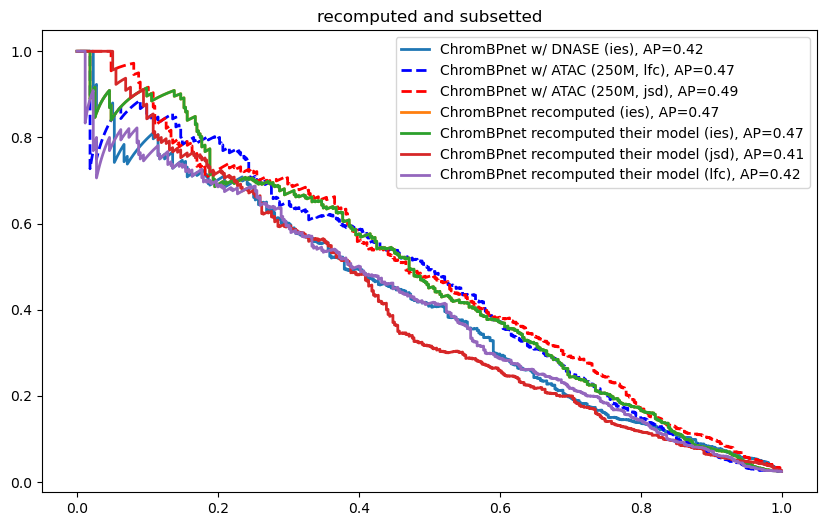

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

keyd="pred.chrombpnet.encsr000emt.varscore.ies"
label=dataf_common["obs.label"].astype(int)
score=abs(dataf_common[keyd])

title="ChromBPnet w/ DNASE (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

keyd='pred.chrombpnet.encsr637xsc_250m.varscore.logfc'
label=dataf_common["obs.label"].astype(int)
score=abs(dataf_common[keyd])

title="ChromBPnet w/ ATAC (250M, lfc)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

keyd='pred.chrombpnet.encsr637xsc_250m.varscore.jsd'
label=dataf_common["obs.label"].astype(int)
score=abs(dataf_common[keyd])

title="ChromBPnet w/ ATAC (250M, jsd)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='red', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))


label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out[2])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out2[2])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed their model (ies)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out2[1])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed their model (jsd)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

label=gkm_svm["label"][subset['var.rsid'].isin(common)].astype(int)
score=abs(out2[0])[subset['var.rsid'].isin(common)]
title="ChromBPnet recomputed their model (lfc)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

ax.set_title('recomputed and subsetted')

ax.legend()

# final things they do in benchmark!

In [14]:
#they do pearson correlations, here they use the actual estimates
import scipy.stats
key_enf_1="pred.enformer.encsr000emt.varscore.local_logfc"
key_enf_2="pred.enformer.encsr000emt.varscore.global_sar"
key_label="obs.label"
obs_estimate="obs.estimate"
chrombpnet_logfc="pred.chrombpnet.encsr000emt.varscore.logfc"
chrombpnet_atac_logfc="pred.chrombpnet.encsr637xsc.varscore.logfc"
delta_svm_key="pred.gkmsvm.encsr000emt.varscore.deltasvm"
chrombpnet_atac_50m_logfc="pred.chrombpnet.encsr637xsc_50m.varscore.logfc"

scipy.stats.pearsonr(dataf[chrombpnet_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])

PearsonRResult(statistic=0.7393262959574392, pvalue=6.552289684724194e-98)

In [18]:
subset

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,obs.estimate
0,chr1,911595,G,A,rs7417106,1,-0.6285
1,chr1,1186502,T,A,rs6603785,1,-0.7363
2,chr1,3369847,G,A,rs55665824,1,-0.7405
3,chr1,11809402,G,T,rs11121820,1,-0.9398
4,chr1,12042261,A,G,rs2236055,1,1.1630
...,...,...,...,...,...,...,...
17501,chr9,140938183,A,G,rs3750506,-1,NaN
17502,chr9,140953297,G,A,rs10780199,-1,NaN
17503,chr9,141035586,T,C,rs7852209,-1,NaN
17504,chr9,141061300,T,C,rs4066694,-1,NaN


In [ ]:
#and let's see what I get when I score it!
# out_sign2[1]
scipy.stats.pearsonr(out_sign2[1][subset[key_label]==1],subset[obs_estimate][subset[key_label]==1])
# scipy.stats.pearsonr(out_sign2
    # dataf[chrombpnet_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])

PearsonRResult(statistic=0.3582909152734314, pvalue=1.2715506510104528e-14)

(560, 2)
PearsonRResult(statistic=0.7586179164294138, pvalue=6.689376032748334e-106)
PearsonRResult(statistic=0.29208596203522214, pvalue=1.7776064659065922e-12)


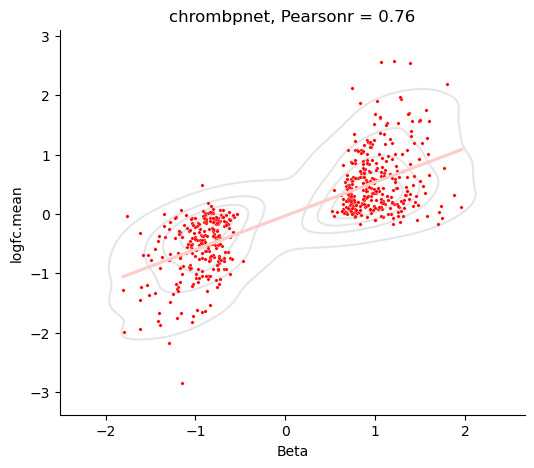

In [21]:
import seaborn as sns
data = pd.DataFrame()
data["logfc.mean"] = dataf[dataf[key_label]==1][chrombpnet_atac_logfc]
data["Beta"] = dataf[dataf[key_label]==1][obs_estimate]

print(data.shape)
plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(dataf[chrombpnet_atac_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])
print(atc_pear)

ax.set_title("chrombpnet, Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(dataf[chrombpnet_atac_logfc][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))
print(atc_pear)

(560, 2)
PearsonRResult(statistic=0.727161386520316, pvalue=3.1602503587972757e-93)


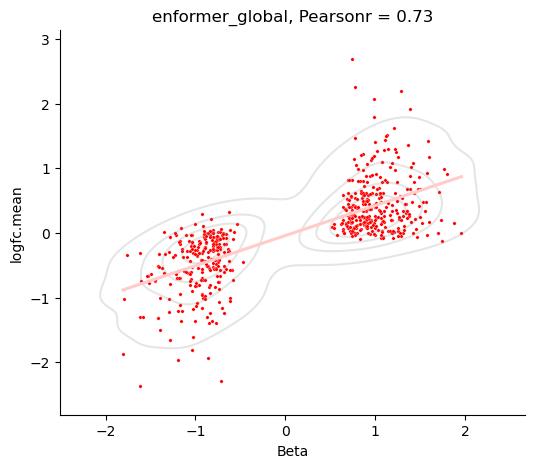

In [27]:
data = pd.DataFrame()
key = key_enf_1
data["logfc.mean"] = dataf[dataf[key_label]==1][key]
data["Beta"] = dataf[dataf[key_label]==1][obs_estimate]

print(data.shape)
plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(dataf[key][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])
print(atc_pear)

ax.set_title("enformer_global, Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(dataf[key][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))

(560, 2)
PearsonRResult(statistic=0.563128780419175, pvalue=3.625037841934749e-48)


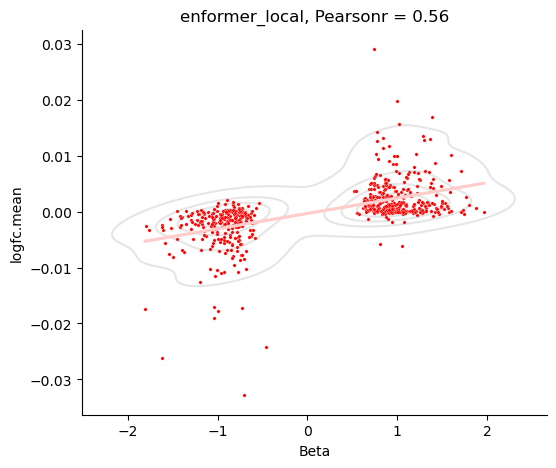

In [28]:
data = pd.DataFrame()
key = key_enf_2
data["logfc.mean"] = dataf[dataf[key_label]==1][key]
data["Beta"] = dataf[dataf[key_label]==1][obs_estimate]

print(data.shape)
plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(dataf[key][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])
print(atc_pear)

ax.set_title("enformer_local, Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(dataf[key][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))

In [29]:
#let's see if we can recreate it using the chrombpnet 2
pred_cbp2['profile'].shape

(17506, 1000, 2)

In [33]:
#let's calculate log fold change
def log2_fold_change(v1, v2, pseudocount=1e-6):
    """
    Compute a single log2 fold-change between two profiles v1, v2.
    
    By default this is log2( mean(v1) / mean(v2) ), with a tiny pseudocount
    to avoid division-by-zero. You could equally well use sum() instead of mean().
    """
    m1 = np.mean(v1,axis=1) + pseudocount
    m2 = np.mean(v2,axis=1) + pseudocount
    return np.log2(m1 / m2)

lfc2 = log2_fold_change(pred_cbp2['profile'][:,:,0], pred_cbp2['profile'][:,:,1])
lfc2.shape

(17506,)

In [35]:
atc_pear = scipy.stats.pearsonr(lfc2[subset[key_label]==1]
                                ,subset[obs_estimate][subset[key_label]==1])
print(atc_pear)

PearsonRResult(statistic=-0.3568248671314619, pvalue=1.6560744938017163e-14)


In [36]:
#wait I think we need to softmax first
lfc2 = log2_fold_change(softmax(pred_cbp2['profile'][:,:,0]), softmax(pred_cbp2['profile'][:,:,1]))
atc_pear = scipy.stats.pearsonr(lfc2[subset[key_label]==1]
                                ,subset[obs_estimate][subset[key_label]==1])
print(atc_pear)

PearsonRResult(statistic=0.0836615405126646, pvalue=0.08134484749596019)


In [37]:
#and the final thing we can do is multiply by the sign
def log2_fold_change(v1, v2, c1=None,c2=None,pseudocount=1e-6):
    """
    Compute a single log2 fold-change between two profiles v1, v2.
    
    By default this is log2( mean(v1) / mean(v2) ), with a tiny pseudocount
    to avoid division-by-zero. You could equally well use sum() instead of mean().
    """
    if c1 is not None and c2 is not None:
        m1 = np.mean(v1,axis=1) + pseudocount
        m2 = np.mean(v2,axis=1) + pseudocount
        return np.sign(c2 - c1) * np.log2(m1 / m2)
    m1 = np.mean(v1,axis=1) + pseudocount
    m2 = np.mean(v2,axis=1) + pseudocount
    return np.log2(m1 / m2)

lfc2 = log2_fold_change(softmax(pred_cbp2['profile'][:,:,0]), softmax(pred_cbp2['profile'][:,:,1]), pred_cbp2['counts'][:,0,0], pred_cbp2['counts'][:,0,1])
atc_pear = scipy.stats.pearsonr(lfc2[subset[key_label]==1]
                                ,subset[obs_estimate][subset[key_label]==1])
print(atc_pear)

PearsonRResult(statistic=-0.05275465698642623, pvalue=0.27225500834697863)


In [40]:
#let's do the original scores
def predict_snp_effect_scores(rsids, ref_count_preds, alt_count_preds, ref_prob_preds, alt_prob_preds):
    '''
    Predicts variant effect scores based on model predictions.

    Arguments::
       ref_logcount_preds: log count predictions at the reference allele with size (N,)
       alt_logcount_preds: log count predictions at the alternate alele with size (N,)
       ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
       alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
    Returns:
        log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
        log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
        probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
    '''
    log_counts_diff = alt_count_preds - ref_count_preds
    log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)

    return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff

out2 = predict_snp_effect_scores(None, pred_cbp2['counts'][:,0,0], pred_cbp2['counts'][:,0,1], pred_cbp2['profile'][:,:,0], pred_cbp2['profile'][:,:,1])
atc_pear = scipy.stats.pearsonr(out2[1][subset[key_label]==1]
                                ,subset[obs_estimate][subset[key_label]==1])
print(atc_pear)

out2 = predict_snp_effect_scores(None, pred_cbp2['counts'][:,0,0], pred_cbp2['counts'][:,0,1], softmax(pred_cbp2['profile'][:,:,0]), softmax(pred_cbp2['profile'][:,:,1]))
atc_pear = scipy.stats.pearsonr(out2[1][subset[key_label]==1]
                                ,subset[obs_estimate][subset[key_label]==1])
print(atc_pear)

PearsonRResult(statistic=0.38612267172899606, pvalue=6.470279147474166e-17)
PearsonRResult(statistic=0.3582909152734314, pvalue=1.2715506510104528e-14)


In [ ]:
#I figured out why, it's because the way it works is logfold change is computed between the allele 1 and 2, but I do reference vs alternate lmfaoooooo

#yyeah that's going to cause major issues...

#but for the lfc and jsd above, it should be fine! This is because abs(lfc) is symmetric, and jsd is defined as symmetric

#on top of these issues, if it's in HG19 that could be a huge problem. So asked Anusri, can redo these analyses later I guess lol! 

#so unsure why JSD is off, but figured out about the lfc is because we need to exponentiate it!

# redoing the direction of effect

In [8]:
import scipy.stats
import pandas as pd

dataf = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/dsqtls.yoruba.lcls.benchmarking.all.tsv', sep='\t')
dataf = dataf[dataf["var.isused"]]

key_enf_1="pred.enformer.encsr000emt.varscore.local_logfc"
key_enf_2="pred.enformer.encsr000emt.varscore.global_sar"
key_label="obs.label"
obs_estimate="obs.estimate"
chrombpnet_logfc="pred.chrombpnet.encsr000emt.varscore.logfc"
chrombpnet_atac_logfc="pred.chrombpnet.encsr637xsc.varscore.logfc"
delta_svm_key="pred.gkmsvm.encsr000emt.varscore.deltasvm"
chrombpnet_atac_50m_logfc="pred.chrombpnet.encsr637xsc_50m.varscore.logfc"

scipy.stats.pearsonr(dataf[chrombpnet_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])

PearsonRResult(statistic=0.7393262959574392, pvalue=6.552289684724194e-98)

In [26]:
from scipy.spatial.distance import jensenshannon
def softmax(x, temp=1):
    norm_x = x - np.mean(x, axis=1, keepdims=True)
    return np.exp(temp*norm_x)/np.sum(np.exp(temp*norm_x), axis=1, keepdims=True)

def get_variant_scores(allele1_pred_counts, allele2_pred_counts,
                       allele1_pred_profiles, allele2_pred_profiles):

    # print('allele1_pred_counts shape:', allele1_pred_counts.shape)
    # print('allele2_pred_counts shape:', allele2_pred_counts.shape)
    # print('allele1_pred_profiles shape:', allele1_pred_profiles.shape)
    # print('allele2_pred_profiles shape:', allele2_pred_profiles.shape)

    logfc = np.squeeze(np.log2(allele2_pred_counts / allele1_pred_counts))
    jsd = np.squeeze([jensenshannon(x, y, base=2.0)
                     for x,y in zip(softmax(allele2_pred_profiles),
                                    softmax(allele1_pred_profiles))])
    ies = logfc * jsd
    return logfc, jsd, ies

pred_cbp2 = np.load('/data1/lesliec/sarthak/data/joint_playground/chrombpnet/dsqtl_models/var_preds.npz')

out2 = get_variant_scores(np.exp(pred_cbp2['counts'][:,0,0]), np.exp(pred_cbp2['counts'][:,0,1]), pred_cbp2['profile'][:,:,0], pred_cbp2['profile'][:,:,1])
scipy.stats.pearsonr(out2[0][subset[key_label]==1],subset[obs_estimate][subset[key_label]==1])

PearsonRResult(statistic=0.3504244417839494, pvalue=5.1657297334664083e-14)

In [10]:
#it's very poor, possibly because we are not doing reference - alt
gkm_svm = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
es = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/GSE31388_dsQtlTable.txt', sep='\t')
gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)
es["rsid"] = es["Chr"]+"."+es["SNP"].astype(str)
gkm_svm = gkm_svm.merge(es, left_on=["SNPname1"], right_on='rsid', how="left").drop_duplicates('SNPname1')
#now we will make our names similar1
subset = gkm_svm[['chrom_hg19', 'pos_hg19', 'allele1', 'allele2', 'SNPname2', 'label', 'Estimate']]
#now rename the headers
headers = ['var.chr', 'var.pos_hg19', 'var.allele1', 'var.allele2', 'var.rsid', 'obs.label', 'obs.estimate']
subset.columns = headers
common = set(subset['var.rsid']).intersection(dataf['var.rsid'])
subset_common = subset[subset['var.rsid'].isin(common)].copy()
dataf_common = dataf[dataf['var.rsid'].isin(common)].copy()


In [11]:
scipy.stats.pearsonr(dataf_common[chrombpnet_logfc][dataf[key_label]==1],dataf_common[obs_estimate][dataf[key_label]==1])

PearsonRResult(statistic=0.731410014589591, pvalue=5.3696963868003066e-74)

In [12]:
scipy.stats.pearsonr(dataf_common[chrombpnet_atac_50m_logfc][dataf[key_label]==1],dataf_common[obs_estimate][dataf[key_label]==1])

PearsonRResult(statistic=0.7290617732369582, pvalue=2.6436093751530578e-73)

In [13]:
subset

,var.chr,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,obs.estimate
0,chr1,911595,G,A,rs7417106,1,-0.6285
1,chr1,1186502,T,A,rs6603785,1,-0.7363
2,chr1,3369847,G,A,rs55665824,1,-0.7405
3,chr1,11809402,G,T,rs11121820,1,-0.9398
4,chr1,12042261,A,G,rs2236055,1,1.1630
...,...,...,...,...,...,...,...
17501,chr9,140938183,A,G,rs3750506,-1,NaN
17502,chr9,140953297,G,A,rs10780199,-1,NaN
17503,chr9,141035586,T,C,rs7852209,-1,NaN
17504,chr9,141061300,T,C,rs4066694,-1,NaN


In [15]:
import pyfaidx
genome_hg19 = pyfaidx.Fasta('/data1/lesliec/sarthak/data/chrombpnet_test/hg19.fa')

In [24]:
ref_match = []
for i in range(subset.shape[0]):
    vals = subset.iloc[i]
    chrom = vals['var.chr']
    pos = vals['var.pos_hg19'] - 1
    allele1 = vals['var.allele1']
    allele2 = vals['var.allele2']
    
    true_seq = genome_hg19[chrom][pos:pos+1].seq
    # print(true_seq)
    # print(vals)
    # break
    if true_seq.upper() == allele1:
        ref_match.append(1)
    elif true_seq.upper() == allele2:
        ref_match.append(-1)
    else:
        print(vals)
        print(true_seq)
        raise ValueError("Allele not found in genome")
ref_match = np.array(ref_match)

In [28]:
#now let's do this again
scipy.stats.pearsonr((out2[0] * -ref_match)[subset[key_label]==1],subset[obs_estimate][subset[key_label]==1])

PearsonRResult(statistic=0.6881188308816848, pvalue=2.6673693985783126e-62)

(435, 2)
PearsonRResult(statistic=0.6881188308816848, pvalue=2.6673693985783126e-62)


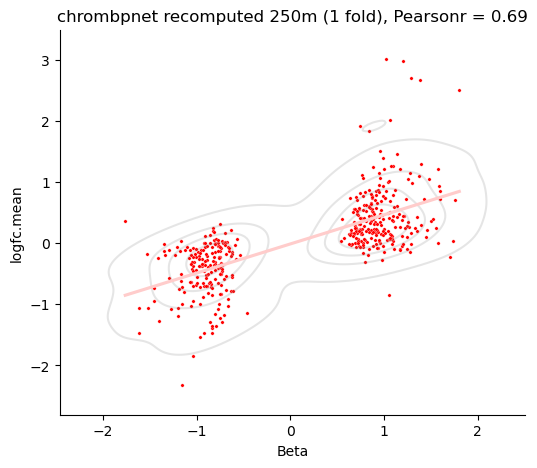

In [32]:
import seaborn as sns
data = pd.DataFrame()
key = key_enf_2
data["logfc.mean"] = (out2[0] * -ref_match)[subset[key_label]==1]
data["Beta"] = subset[subset[key_label]==1][obs_estimate]

print(data.shape)
plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr((out2[0] * -ref_match)[subset[key_label]==1],subset[obs_estimate][subset[key_label]==1])
print(atc_pear)

ax.set_title("chrombpnet recomputed 250m (1 fold), Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(dataf[key][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))

In [37]:
#and let's do it for the other one
pred_cbp = np.load('/data1/lesliec/sarthak/data/joint_playground/chrombpnet/GM12878_Tcellbias/var_prds.npz')

out = get_variant_scores(np.exp(pred_cbp['counts'][:,0,0]), np.exp(pred_cbp['counts'][:,0,1]), pred_cbp['profile'][:,:,0], pred_cbp['profile'][:,:,1])

(435, 2)
PearsonRResult(statistic=0.6715662867641452, pvalue=2.3569115594134228e-58)


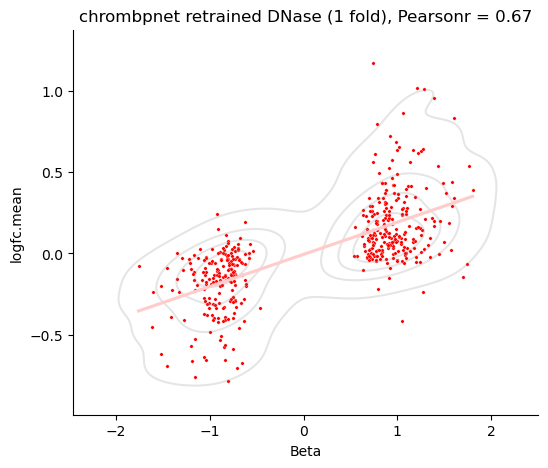

In [38]:
data = pd.DataFrame()
key = key_enf_2
data["logfc.mean"] = (out[0] * -ref_match)[subset[key_label]==1]
data["Beta"] = subset[subset[key_label]==1][obs_estimate]

print(data.shape)
plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data['logfc.mean'],data['Beta'])
print(atc_pear)

ax.set_title("chrombpnet retrained DNase (1 fold), Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(dataf[key][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))

# final potential things

They might do reverse complement, that could be an improvement

If not that, go through their variant effect prediction code one step at a time, make sure it works and actually makes sense!! We should replicate it exactly, same window, same augmentation, save RC etc.